# Worked 2 - Andrew Koren
Charges on a stick

This will be a simple problem about a dipole moving through an electric field. Since these worked problems aren't supposed to be too crazy, we'll use a few assumptions to simplify things.

- Provide a plan for investigating the physical system (10%)

Our investigation will primarily be focused on visualizing the system for various dipoles. We will establish a lagrangian and use it to develop our equations of motion. Since this is a two-body system we'll create a unified coordinate system which allows for both charges to be modeled using fewer parameters. From there, we will analyze phase portraits to determine the overall behaviour of the system and then create 2D plots of varous initial conditions. These 2D plots will be the best for showing how various charges move through a potential/voltage

1. Mechanical System to Study

Our system will consist of a dipole made by two electric charges separated by a distance $2r$ with total mass $m$ and moment of inertia $I = mr^2$ 

Electric dipoles occure when opposite electric charges are are stuck together and are common in nature. One of the most famous is water, which will orient itself towards an electric field when in vapor form.

Our system will allow us to see how electric dipoles interact with simple electric fields. First, we will derive a situation where $q+ = q-$ and realize how *boring* it is, then try a system where $q+$ and $q-$ are independent

2. Developing the Lagrangian

The most important assumption in our system is that the free object is made of two point charges affixed together. Usually real systems will have some elasticity or have charge more spread out, but for our purposes this is good enough to see how the object bends.

As usual, our $\mathcal{L}$ agrangian is

$$
\mathcal{L} = T - U
$$

In this case, our poential is an electric potential field (voltage) which has different affects on each particle. Lets use the volatage generated by a capacitor, whose size is very large comapared to that of the dipole. This capacitor assumption is common: since the plates are large compared to the charge, the charge observes an effectively constat electric field, aka a linear voltage

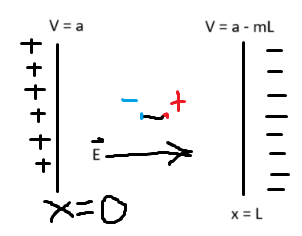


$$
V = a - bx
$$

To find electric potential energy, one must multiply this value by the charge value. This voltage has different affects on each charge, so the potential of the dipole for two opposite point charges is

$$
U = (q)(a - b(x_+)) + (-q)(a - b(x_-)) = bq(x_- - x_+)
$$

Where $x_-$ and $x_+$ represent the negative and positive point charges, respectively. Since we'll be considering angular momentum in the kinetic energy, we'll convert this to terms of center of mass $x_{cm}$ and angle $\theta$, where $\theta=0$ represents the postive charge pointing towards the negative capacitor plate. Then

$$
x_- - x_+ = 2r\cos\theta \\
U = 2qrb\cos\theta
$$

This goes to zero for $\theta=\pi/2$, which makes sense since it results in each point charge being atop each other

Kinetic energy is easy to represent using center of mass coordinates

$$
T = \frac{1}{2}m\left(\dot x_{cm}^2 + \dot y_{cm}^2 \right) + \frac{1}{2} I \dot \theta^2 \\
$$

This yields the lagrangian

$$
\mathcal{L} = \frac{1}{2}m\left(\dot x_{cm}^2 + \dot y_{cm}^2 \right) + \frac{1}{2} I \dot \theta^2 - 2qrb\cos\theta
$$

3. Finding the EOM

Our three equations of motion are

$$
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot x} - \frac{\partial \mathcal{L}}{\partial x} = 0 \\
\frac{\partial \mathcal{L}}{\partial x} = 0 \\
\frac{d}{dt} m \dot x = 0 \\
\ddot x = 0\\
\ddot y = 0\\
$$
Where $\ddot y$ comes naturally by following the same steps as for calculating $\ddot x$ That's right, this electric potential provides no net linear force. Since the two charges are equal, the voltage isn't able to produce a net pull. This is somewhat dissatisfying, so how about we use a more interesting system. We'll make $q+ = q_1$ and $q- = q_2$ be two charges which can have varying parameters. Then we can re-develop our lagrangian with the new potential

2.  The Lagrangian (again)

$$
U = q_1(a-b(x_+)) + q_2(a-b(x_-))
$$
Now we'll instead relate each $x_+$ and $x_-$ to $x_{cm}$ and $\theta$

$$
x_+ = x_{cm} + r\cos\theta \\
x_- = x_{cm} - r\cos\theta \\
U = q_1(a-b(x_{cm} + r\cos\theta)) + q_2(a-b(x_{cm} - r\cos\theta))
$$
Without loss of generality, set a=0 to speed things along

$$
U = -q_1bx_{cm} + -q_1br\cos\theta + -q_2x_{cm} + q_2br\cos\theta \\
= -bx_{cm}(q_1+q_2) + (q_2-q_1)br\cos\theta
$$
This now has a term related to angle and center of mass, and it collapses to our earlier expression when $q_1 = -q_2$

$$
\mathcal{L} = \frac{1}{2}m\left(\dot x_{cm}^2 + \dot y_{cm}^2 \right) + \frac{1}{2} I \dot \theta^2 + bx_{cm}(q_1+q_2) - (q_2-q_1)br\cos\theta
$$
$$

3. EOMs (again)

Now we have some more interesting EOMs

$$
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot x_{cm}} - \frac{\partial \mathcal{L}}{\partial x_{cm}} = 0 \\
\frac{\partial \mathcal{L}}{\partial x_{cm}} = b(q_1 + q_2) \\
m \ddot x - b(q_1 + q_2) = 0\\
\ddot x = \frac{b(q_1 + q_2)}{m}\\
\ddot y = 0
$$
A very kind result, $\ddot y$ is still zero, so we're still not doing anything too complicated. As for angle, we get

$$
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot \theta} - \frac{\partial \mathcal{L}}{\partial \theta} = 0 \\
\frac{\partial \mathcal{L}}{\partial \theta} = (q_2-q_1)br \sin \theta \\
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot \theta} = I\ddot \theta
= mr^2\ddot \theta
mr^2\ddot \theta - (q_2-q_1)br \sin \theta = 0 \\
\ddot \theta = \frac{(q_2-q_1)b \sin \theta }{mr}
$$


Can we derive analytical solutions to these equations? Well $\ddot x$ is trivial, but $\ddot \theta$ has no analytical solution. Let's move on to numerical modeling

4. Numerical solutions

Our two relevant EOMs are independent of eachother, which means creating phase portraits is quite simple. My end objective is to make a gif of a particle moving through 2D space and observe it's behavior.

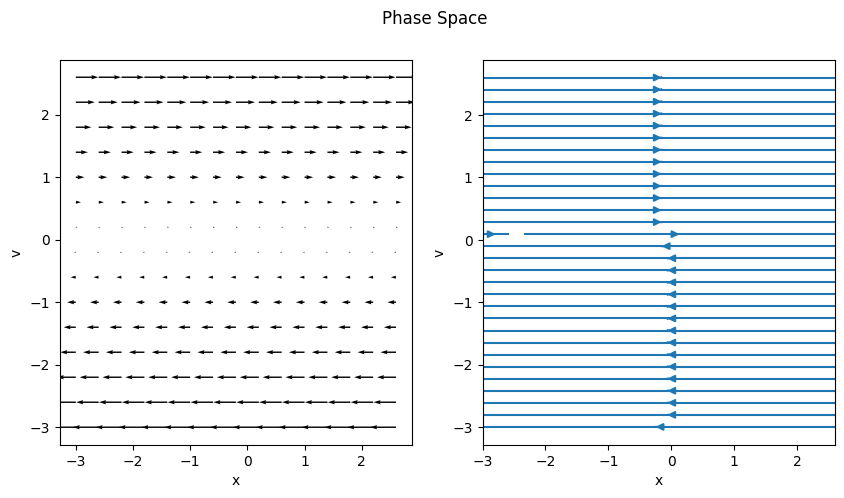

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def x_EOM(X, V, params):
    b, m, q1, q2, _ = params
    xdot = V
    vdot = b*(q1+q2)/m
    return xdot, vdot

def get_points(X, V, func, params):
    dx, dv =  np.zeros(X.shape), np.zeros(V.shape)

    xlim, ylim = X.shape
    for i in range(xlim):
        for j in range(ylim):
            xloc = X[i,j]
            vloc = V[i,j]
            dx[i,j], dv[i,j] = func(xloc, vloc, params)
    
    return(dx, dv)


def make_phase_space(X, V, dx, dv):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.quiver(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.subplot(1,2,2)
    plt.streamplot(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.suptitle("Phase Space")
    plt.show()

x = np.arange(-3, 3, 0.4)
v = np.arange(-3, 3, 0.4)

# Make grid
X, V = np.meshgrid(x, v)

b = 1
m = 1
q1 = 1
q2 = -1
r = 0.01

params = [b, m, q1, q2, r]

dx, dv = get_points(X, V, x_EOM, params)
make_phase_space(X, V, dx, dv)

Without any net charge there isn't any linear action, and velocity is constant. Net negative and positive should pull the phase portrait left or right

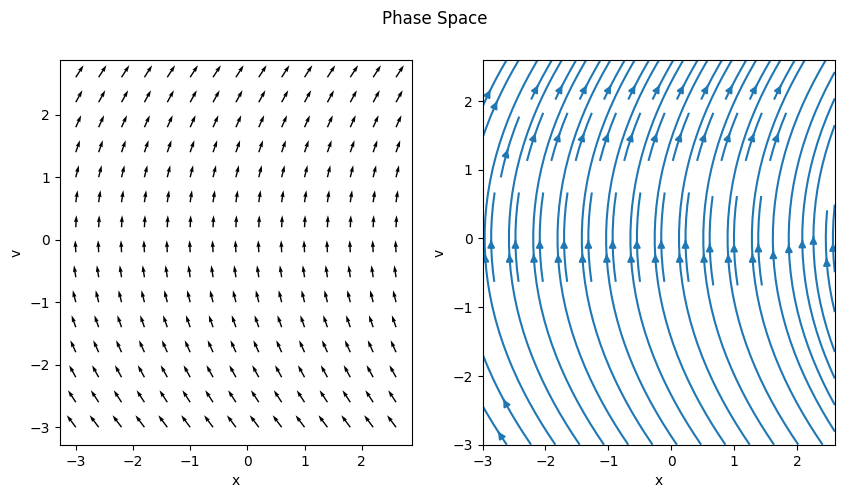

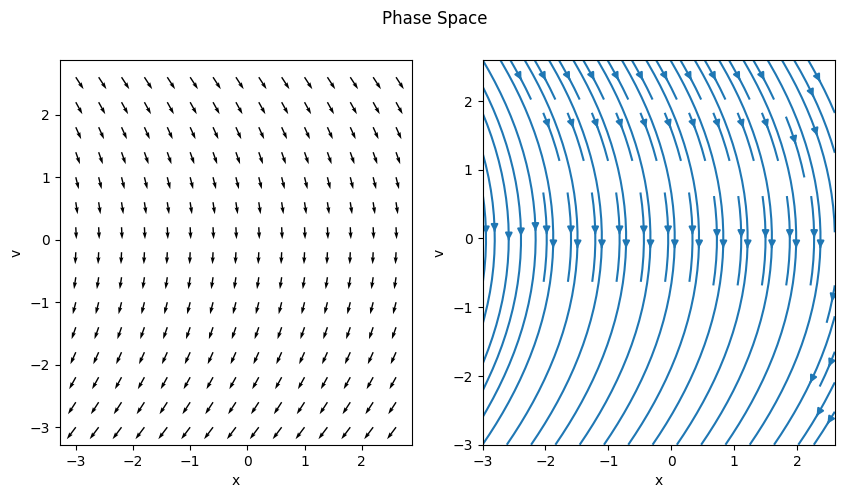

In [31]:
q1 = 5
q2 = -1
params = [b, m, q1, q2, r]

dx, dv = get_points(X, V, x_EOM, params)
make_phase_space(X, V, dx, dv)


q1 = 1
q2 = -5
params = [b, m, q1, q2, r]

dx, dv = get_points(X, V, x_EOM, params)
make_phase_space(X, V, dx, dv)

As previously mentioned, this applies a very simple skew, which can be increased/decreased by changing the other parameters. There isn't anything especially interesting about this result. I am more curious about how the dipole behaves for various charge values. 

Here it is:

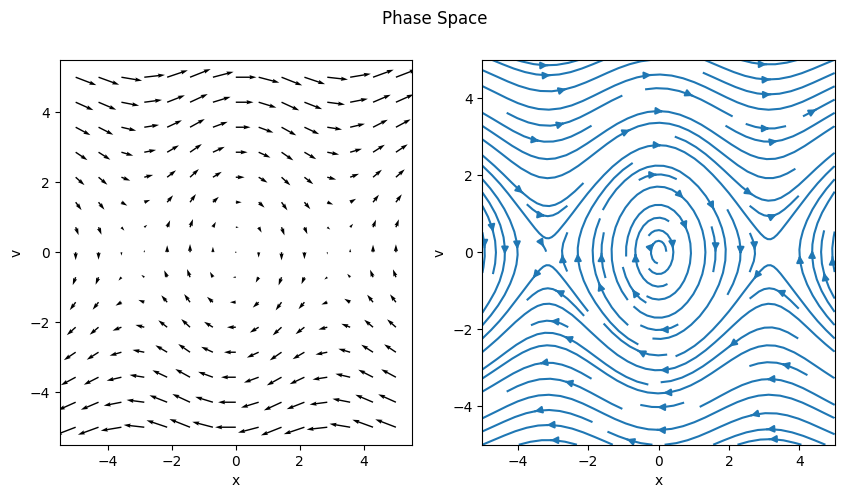

In [32]:
def angle_EOM(theta, omega, params):
    b, m, q1, q2, r = params
    dtheta = omega
    domega = (q2 - q1)*b*np.sin(theta)/(m*r)

    return dtheta, domega

#Starting with q1 = -q2
b = 1
m = 1
q1 = 1
q2 = -1
r = 1

params = [b, m, q1, q2, r]

x = np.linspace(-5, 5, 15)
v = np.linspace(-5, 5, 15)

# Make grid
X, V = np.meshgrid(x, v)

dx, dv = get_points(X, V, angle_EOM, params)
make_phase_space(X, V, dx, dv)


Interestingly, when the charges are even it ends up being a harmonic oscillator. If the initial value is some $2\pi n$ with no initial velocity, the electric field has little affect on the dipole. If it is at $2\pi n + \pi$ it is at an unstable point and recieves the maximum torque. Let's check out net positive and negative charges

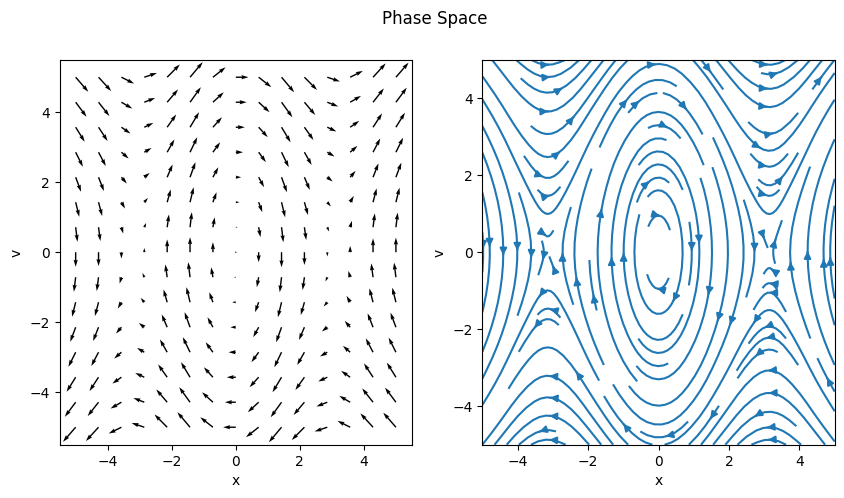

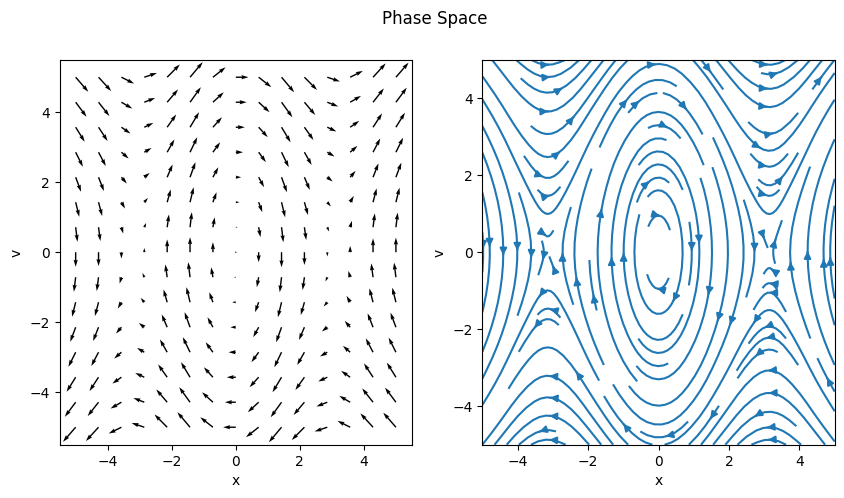

In [33]:
q1 = 5
q2 = -1

params = [b, m, q1, q2, r]

dx, dv = get_points(X, V, angle_EOM, params)
make_phase_space(X, V, dx, dv)

q1 = 1
q2 = -5

params = [b, m, q1, q2, r]

dx, dv = get_points(X, V, angle_EOM, params)
make_phase_space(X, V, dx, dv)

It appears that the magnitude of the difference is correlated to the magnitude of torque, but doesn't change the locations of critical points. I expected the two charges to align with the electric field, but it appears this potential is unable to cause this result.

Putting everything together we can observe the trajectory of the dipole for various initial conditions using solve_ivp. solve_ivp is great for 1D problems, but since each equation of motion is an ODE we can solve three diferrent problems on the same time scale and put them together for plotting the solution

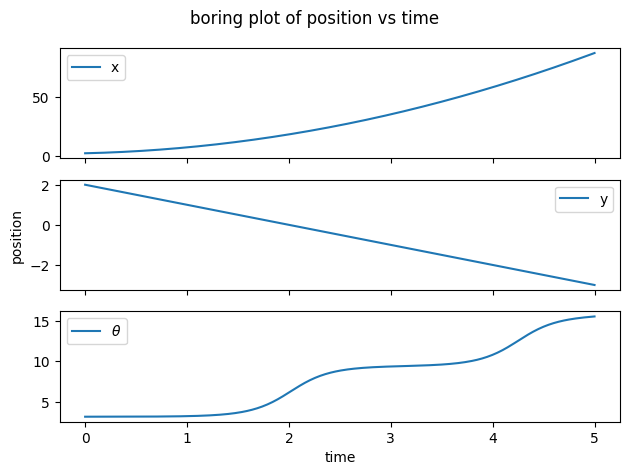

In [34]:
from scipy.integrate import solve_ivp

def x_EOM_scipy(t, p0, params):
    X, V = p0
    b, m, q1, q2, _ = params

    xdot = V
    vdot = b*(q1+q2)/m
    return xdot, vdot

def y_EOM_scipy(t, p0):
    y, v = p0
    return v, 0

def angle_EOM_scipy(t, p0, params):
    theta, omega = p0
    b, m, q1, q2, r = params

    dtheta = omega
    domega = (q2 - q1)*b*np.sin(theta)/(m*r)

    return dtheta, domega
 
#parameters
b = 1
m = 1
q1 = 7
q2 = -1
r = 0.5

params = [b, m, q1, q2, r]


#initial conditions
x_conditions = [2, 2]
y_conditions = [2, -1]
angle_conditions = [np.pi, 0.01]
end = 5
framerate = 60

t_eval = np.linspace(0, end, end*framerate)

#solve for time frame
xsol = solve_ivp(x_EOM_scipy, (0, end), x_conditions, t_eval = t_eval, args=[params])
ysol = solve_ivp(y_EOM_scipy, (0, end), y_conditions, t_eval = t_eval)
asol = solve_ivp(angle_EOM_scipy, (0, end), angle_conditions, t_eval = t_eval, args=[params])

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(xsol.t, xsol.y[0], label = 'x')
axs[0].legend()
axs[1].plot(ysol.t, ysol.y[0], label = 'y')
axs[1].legend()
axs[1].set_ylabel('position')
axs[2].plot(asol.t, asol.y[0], label = r'$\theta$')
axs[2].legend()
plt.xlabel('time')
plt.suptitle('boring plot of position vs time')
plt.tight_layout();


Aside from the funny wiggles, this plot is incredibly boring, and doesn't really show what is happening. In addition, angle should have a domain $0$ to $2\pi$. Let's make a function that puts everything together in 2D space

Text(0, 0.5, 'y position')

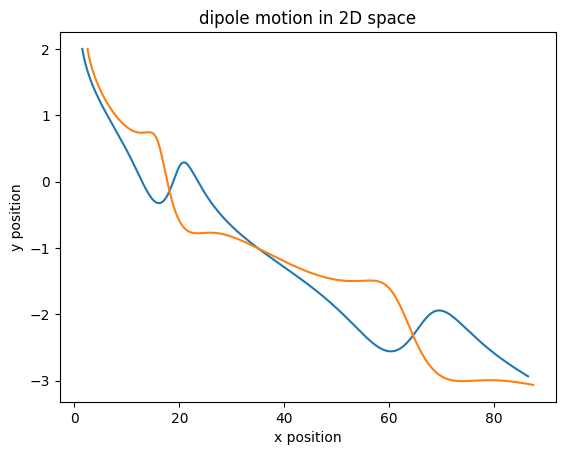

In [35]:
def charge_1(x, y, theta, r):
    x_loc = x + r * np.cos(theta)
    y_loc = y + r * np.sin(theta)
    return x_loc, y_loc

def charge_2(x, y, theta, r):
    x_loc = x - r * np.cos(theta)
    y_loc = y - r * np.sin(theta)
    return x_loc, y_loc

c1x, c1y = charge_1(xsol.y[0], ysol.y[0], asol.y[0], r)
c2x, c2y = charge_2(xsol.y[0], ysol.y[0], asol.y[0], r)

plt.plot(c1x, c1y)
plt.plot(c2x, c2y)
plt.title('dipole motion in 2D space')
plt.xlabel('x position')
plt.ylabel('y position')


Okay, this parametric equation gives a better picture as to what is going on.The two charges flip sides as they accelerate forward in space, and trace very interesting patterns as the go. The electric field causes acceleration in the x-direction, causing the x-scale to be much larger. Let's try animating this

In [36]:
from matplotlib.animation import PillowWriter
metadata = {'title': 'Movie', 'artist': 'AndrewKoren'}
writer = PillowWriter(fps=framerate, metadata=metadata)

fig = plt.figure(figsize=(8,8))


with writer.saving(fig, 'dipole1.webp', 100):
    for i, t in enumerate(t_eval):
        plt.xlim(-10, 70)
        plt.ylim(-70, 10)

        plt.scatter(c1x[i], c1y[i], c='blue')
        plt.scatter(c2x[i], c2y[i], c='red')

        writer.grab_frame()
        fig.clf()

<Figure size 800x800 with 0 Axes>

(animations are released into your directory, sorry!) 

Notice how the charges will start and stop rotating. The electric field accelerates and then slows rotation of the dipole, so with these initial conditions it can only barely rotate through. Let's try different initial conditions


In [37]:
def make_charge_path(initial_conditions, params, time_params):
    r = params[-1]

    #initial conditions
    x_conditions, y_conditions, angle_conditions = initial_conditions
    end, framerate = time_params

    t_eval = np.linspace(0, end, end*framerate)

    #solve for time frame
    xsol = solve_ivp(x_EOM_scipy, (0, end), x_conditions, t_eval = t_eval, args=[params])
    ysol = solve_ivp(y_EOM_scipy, (0, end), y_conditions, t_eval = t_eval)
    asol = solve_ivp(angle_EOM_scipy, (0, end), angle_conditions, t_eval = t_eval, args=[params])

    c1x, c1y = charge_1(xsol.y[0], ysol.y[0], asol.y[0], r)
    c2x, c2y = charge_2(xsol.y[0], ysol.y[0], asol.y[0], r)

    return (c1x, c1y), (c2x, c2y)


#parameters
b = 1
m = 1
q1 = 4
q2 = -1
r = 0.1

params = [b, m, q1, q2, r]

#initial conditions
x_conditions = [2, -3]
y_conditions = [-70, 7]
angle_conditions = [np.pi, 0.01]
initial_conditions = (x_conditions, y_conditions, angle_conditions)

end = 10
framerate = 30
time_parameters = end, framerate

c1, c2 = make_charge_path(initial_conditions, params, time_parameters)

fig = plt.figure(figsize=(8,8))


with writer.saving(fig, 'dipole2.webp', 100):
    for i, t in enumerate(t_eval):
        plt.xlim(-10, 70)
        plt.ylim(-70, 10)

        plt.scatter(c1x[i], c1y[i], c='blue')
        plt.scatter(c2x[i], c2y[i], c='red')

        plt.scatter(c1[0][i], c1[1][i], c='green')
        plt.scatter(c2[0][i], c2[1][i], c='yellow')


        writer.grab_frame()
        fig.clf()

<Figure size 800x800 with 0 Axes>

Above we used 1/5 the radius and a slightly smaller charge difference. Despite the reduced charge difference, the rate of rotation was much greater due to the reduction in moment of inertia. Next we'll try a very large separation and a net negative charge

In [38]:
#parameters
b = 1
m = 1
q1 = 1
q2 = -4
r = 3

params = [b, m, q1, q2, r]

#initial conditions
x_conditions = [50, 0]
y_conditions = [-70, 7]
angle_conditions = [np.pi, 0.01]
initial_conditions = (x_conditions, y_conditions, angle_conditions)

end = 10
framerate = 30
time_parameters = end, framerate

c1_2, c2_2 = make_charge_path(initial_conditions, params, time_parameters)

fig = plt.figure(figsize=(8,8))


with writer.saving(fig, 'dipole3.webp', 100):
    for i, t in enumerate(t_eval):
        plt.xlim(-10, 70)
        plt.ylim(-70, 10)

        plt.scatter(c1x[i], c1y[i], c='blue')
        plt.scatter(c2x[i], c2y[i], c='red')

        plt.scatter(c1[0][i], c1[1][i], c='green')
        plt.scatter(c2[0][i], c2[1][i], c='yellow')

        plt.scatter(c1_2[0][i], c1_2[1][i], c='orange')
        plt.scatter(c2_2[0][i], c2_2[1][i], c='cyan')


        writer.grab_frame()
        fig.clf()

<Figure size 800x800 with 0 Axes>

Haha the second set of charges flies through the third. These charges aren't actually interacting with each other, they're just plotted on the same space. Plotting multiple charges is a many-body problem that can't exactly be solved in a week, and is in fact a chaotic system.

In summary, we have an effective model of how a rigid dipole moves through a linear voltage (constant electric field). Additional complexity can be obtaind by implementing time-dependence or a voltage with y-position dependence, or interactions between dipoles. For the purposes of this assignment, this is a good stopping point.